## Problem Statement:-
Using visualization techniques show the best performer(Batsman, Bowler, Fielder,Key Player) in the entire IPL tournament from 2008-2020 with needful justifications.

We are going to find out the foloowing question:-
- Question 1: Which team has won most of the matches?
- Question 2 : Who has won the most no. of man of the matches?
- Question 3:- Which season had most no. of matches and why?
- Question 4: Has toss-winning helped team to win match?
- Question 5: Teams with most no. of wins per season?
- Question 6: Venue that hosted maximum no. of matches?
- Question 7: Which team has won most no. of toss?
- Question 8: Which has higher chance of win: Chasing(Fielding First) or Battin
- Question 9: Biggest win :Chasing(Field first) and Batting First.
- Question 10: Which Umpire has hosted maximun no. of match?

In [1]:
#importing the necessary libraries
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.pandas.set_option('display.max_columns',None)

In [3]:
#this piece of code will make the visualization embedded with max height,width allowing us to analyze at same block
from IPython.display import display, HTML
CSS = """div.output_area img {max-width:None !important;max-height: None !important";}"""
display(HTML('<style>{}</style>'.format(CSS)))

In [4]:
#importing the dataset
df = pd.read_csv(r"C:\Users\avina\OneDrive\Desktop\Data\IPL Matches 2008-2020.csv")

In [5]:
df.head(20)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan
5,335987,Jaipur,2008-04-21,SR Watson,Sawai Mansingh Stadium,0,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,bat,Rajasthan Royals,wickets,6.0,N,NaN,Aleem Dar,RB Tiffin
6,335988,Hyderabad,2008-04-22,V Sehwag,"Rajiv Gandhi International Stadium, Uppal",0,Deccan Chargers,Delhi Daredevils,Deccan Chargers,bat,Delhi Daredevils,wickets,9.0,N,NaN,IL Howell,AM Saheba
7,335989,Chennai,2008-04-23,ML Hayden,"MA Chidambaram Stadium, Chepauk",0,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,Chennai Super Kings,runs,6.0,N,NaN,DJ Harper,GA Pratapkumar
8,335990,Hyderabad,2008-04-24,YK Pathan,"Rajiv Gandhi International Stadium, Uppal",0,Deccan Chargers,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,3.0,N,NaN,Asad Rauf,MR Benson
9,335991,Chandigarh,2008-04-25,KC Sangakkara,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,Kings XI Punjab,runs,66.0,N,NaN,Aleem Dar,AM Saheba


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
id                 816 non-null int64
city               803 non-null object
date               816 non-null object
player_of_match    812 non-null object
venue              816 non-null object
neutral_venue      816 non-null int64
team1              816 non-null object
team2              816 non-null object
toss_winner        816 non-null object
toss_decision      816 non-null object
winner             812 non-null object
result             812 non-null object
result_margin      799 non-null float64
eliminator         812 non-null object
method             19 non-null object
umpire1            816 non-null object
umpire2            816 non-null object
dtypes: float64(1), int64(2), object(14)
memory usage: 108.5+ KB


In [7]:
df.describe()

,id,neutral_venue,result_margin
count,8.160000e+02,816.000000,799.000000
mean,7.563496e+05,0.094363,17.321652
std,3.058943e+05,0.292512,22.068427
min,3.359820e+05,0.000000,1.000000
25%,5.012278e+05,0.000000,6.000000
50%,7.292980e+05,0.000000,8.000000
75%,1.082626e+06,0.000000,19.500000
max,1.237181e+06,1.000000,146.000000


## Dealing with  Missing Data:-

In [8]:
#building a dataframe with total no. of missing values and its percentage
total = df.isnull().sum()
percent = (df.isnull().sum()/df.shape[0])*100
missing_data = pd.concat([total,percent],axis=1,keys = ['Total_missing','%tage_of_missing'])

In [9]:
missing_data

,Total_missing,%tage_of_missing
id,0,0.000000
city,13,1.593137
date,0,0.000000
player_of_match,4,0.490196
venue,0,0.000000
neutral_venue,0,0.000000
team1,0,0.000000
team2,0,0.000000
toss_winner,0,0.000000
toss_decision,0,0.000000


In [10]:
#extracting out all the features which has more than 30% missing values
features = [features for features in df.columns if (df[features].isnull().sum()/816)*100 >30]
features

['method']

In [11]:
#dropping the feature 'method' because it has more than 30% missing value and irrelevant to our dataset
df = df.drop(features,axis=1)

In [12]:
df

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,Nitin Menon,PR Reiffel
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,CB Gaffaney,Nitin Menon
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,PR Reiffel,S Ravi
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,PR Reiffel,S Ravi


In [13]:
df.isnull().sum()

id                  0
city               13
date                0
player_of_match     4
venue               0
neutral_venue       0
team1               0
team2               0
toss_winner         0
toss_decision       0
winner              4
result              4
result_margin      17
eliminator          4
umpire1             0
umpire2             0
dtype: int64

Since, now we have features with very less missing values and we cannot impute the data with any sort of methods because those data are based on location,result_margin etc. which will not make much sense to impute data as it may deny the true event.
So, we will simply going to get rid of those data i.e. we will delete all the columns containtaining missing data and proceed.

In [14]:
df = df.dropna()

In [15]:
df.isnull().any()

id                 False
city               False
date               False
player_of_match    False
venue              False
neutral_venue      False
team1              False
team2              False
toss_winner        False
toss_decision      False
winner             False
result             False
result_margin      False
eliminator         False
umpire1            False
umpire2            False
dtype: bool

In [16]:
df.shape

(786, 16)

Thus, after handling  missing data we now have dataset shape as (786,16) from (816,16).

## Information Retrieval/Visualization:-
Here, we are going to try to solve some of the questions. 

### Question 1: Which team has won most of the matches?

In [17]:
match_winners = df['winner'].value_counts()

In [18]:
match_winners

Mumbai Indians                 118
Chennai Super Kings            103
Kolkata Knight Riders           97
Royal Challengers Bangalore     87
Kings XI Punjab                 82
Rajasthan Royals                79
Delhi Daredevils                65
Sunrisers Hyderabad             63
Deccan Chargers                 29
Delhi Capitals                  17
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

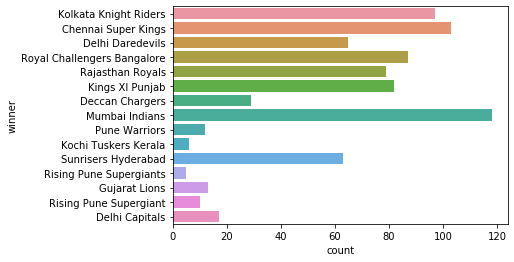

In [19]:
sns.countplot(y='winner',data=df)

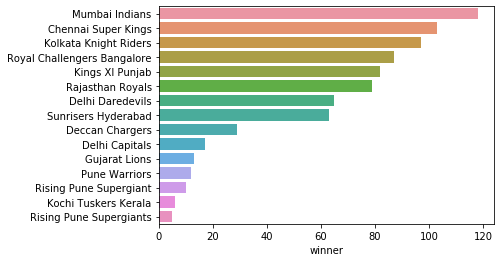

In [20]:
sns.barplot(y=match_winners.index,x=match_winners,data=df)

Clearly, we can see that Mumbai Indians is the team who won the most no. of matches with 118 wins followed by Chennai Supper kings with 103 wins and so on.

### Question 2 : Who has won the most no. of man of the matches?

In [21]:
player_ofthematch = df['player_of_match'].value_counts()

In [22]:
player_ofthematch

CH Gayle          22
AB de Villiers    22
RG Sharma         18
DA Warner         17
MS Dhoni          17
                  ..
JD Ryder           1
GH Vihari          1
SO Hetmyer         1
J Botha            1
LJ Wright          1
Name: player_of_match, Length: 232, dtype: int64

In [23]:
player_ofthematch_10 = player_ofthematch[:10]
player_ofthematch_10

CH Gayle          22
AB de Villiers    22
RG Sharma         18
DA Warner         17
MS Dhoni          17
SR Watson         16
YK Pathan         15
SK Raina          14
G Gambhir         13
MEK Hussey        12
Name: player_of_match, dtype: int64

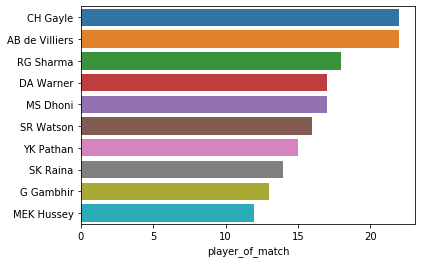

In [24]:
sns.barplot(y=player_ofthematch_10.index,x=player_ofthematch_10,data=df)

Clearly we can see that :-
Most no. of Player of the match awarded to = Chris Gayle-22

### How many players have won the player of the match award in IPL history??

In [25]:
df['player_of_match'].nunique()

232

And, the answer is 232.

### Question 3:- Which season had most no. of matches and why?

In [26]:
# for doing so first we have to add a new column with season(year)
import datetime

In [27]:
df['season'] = pd.DatetimeIndex(df['date']).year

In [28]:
df

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2,season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,BF Bowden,K Hariharan,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810,1216546,Dubai,2020-10-20,S Dhawan,Dubai International Cricket Stadium,0,Delhi Capitals,Kings XI Punjab,Delhi Capitals,bat,Kings XI Punjab,wickets,5.0,N,C Shamshuddin,RK Illingworth,2020
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,CB Gaffaney,Nitin Menon,2020
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,PR Reiffel,S Ravi,2020
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,PR Reiffel,S Ravi,2020


In [29]:
max_matches_season = df['season'].value_counts()

In [30]:
max_matches_season

2013    74
2012    74
2011    72
2018    60
2016    60
2010    59
2017    58
2008    58
2019    57
2020    56
2015    56
2009    56
2014    46
Name: season, dtype: int64

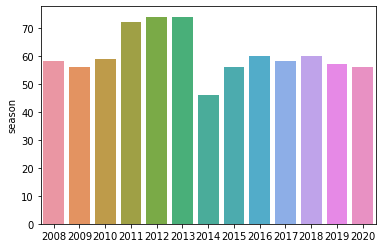

In [31]:
sns.barplot(y=max_matches_season,x=max_matches_season.index,data=df)

In [32]:
df.groupby('season')['team1'].nunique()

season
2008     8
2009     7
2010     8
2011    10
2012     9
2013     9
2014     8
2015     8
2016     8
2017     8
2018     8
2019     8
2020     8
Name: team1, dtype: int64

Therefore, the season with most IPL matches was 2012 and 2013 with 74 matches played while 2011 with 72 matches played.
and surprisingly, we can clearly see that in season 2012 and 2013 - 9 IPL teams were players whereas in 2011 - 10 IPL Teams.
Still, 2012 & 2013 season had most  of the matches, this might happen because of the "more abondoned game in 2011" or due to change of match fixtures.

### Question 4: Has toss-winning helped team to win match?

In [33]:
toss_1 = df['toss_winner'] == df['winner']

In [34]:
toss_1.value_counts()

True     408
False    378
dtype: int64

Thus, for 408 times the team who won the toss-won the match.
and 378 times team who won the toss lost the match.

### Question 5: Teams with most no. of wins per season?

In [35]:
wins_season = df.groupby('season')['winner'].value_counts()

In [36]:
wins_season

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2020    Chennai Super Kings             6
        Kolkata Knight Riders           6
        Rajasthan Royals                6
        Royal Challengers Bangalore     6
        Kings XI Punjab                 5
Name: winner, Length: 107, dtype: int64

In [37]:
year = 2008
win_per_season_df = pd.DataFrame(columns=['year', 'team', 'wins'])
for items in wins_season.iteritems():    
    if items[0][0]==year:
        print(items)
        win_series = pd.DataFrame({
            'year': [items[0][0]],
            'team': [items[0][1]],
            'wins': [items[1]]
        })
        win_per_season_df = win_per_season_df.append(win_series)
        year += 1   

((2008, 'Rajasthan Royals'), 13)
((2009, 'Delhi Daredevils'), 10)
((2010, 'Mumbai Indians'), 11)
((2011, 'Chennai Super Kings'), 11)
((2012, 'Kolkata Knight Riders'), 12)
((2013, 'Mumbai Indians'), 13)
((2014, 'Kolkata Knight Riders'), 10)
((2015, 'Chennai Super Kings'), 10)
((2016, 'Sunrisers Hyderabad'), 11)
((2017, 'Mumbai Indians'), 11)
((2018, 'Chennai Super Kings'), 11)
((2019, 'Chennai Super Kings'), 10)
((2020, 'Mumbai Indians'), 11)


In [38]:
win_per_season_df

,year,team,wins
0,2008,Rajasthan Royals,13
0,2009,Delhi Daredevils,10
0,2010,Mumbai Indians,11
0,2011,Chennai Super Kings,11
0,2012,Kolkata Knight Riders,12
0,2013,Mumbai Indians,13
0,2014,Kolkata Knight Riders,10
0,2015,Chennai Super Kings,10
0,2016,Sunrisers Hyderabad,11
0,2017,Mumbai Indians,11


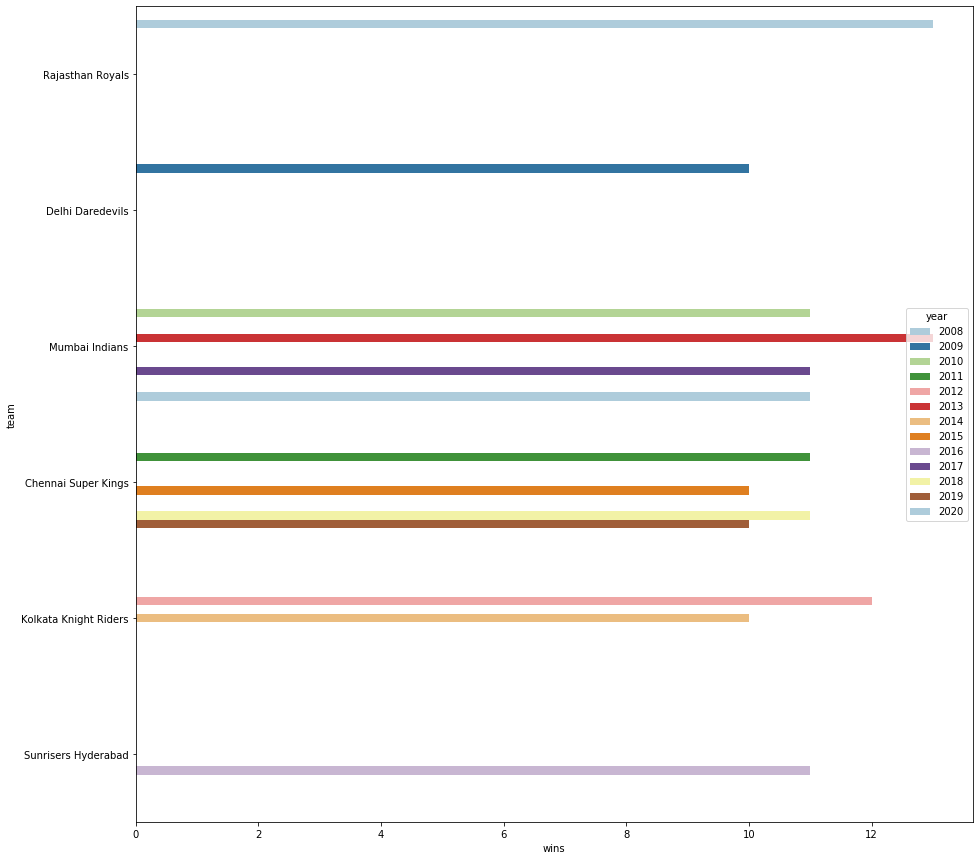

In [39]:
plt.figure(figsize = (15,15))
sns.barplot('wins', 'team', hue='year', data=win_per_season_df, palette='Paired')
plt.show()

In above dataframe and bar plot, we can clearly see those teams who won most game from 2008 to 2020 season with no. of games.

### Question 6: Venue that hosted maximum no. of matches?

In [40]:
venue_count = df['venue'].value_counts()

In [41]:
venue_count

Eden Gardens                                            77
Wankhede Stadium                                        72
Feroz Shah Kotla                                        72
Rajiv Gandhi International Stadium, Uppal               63
M Chinnaswamy Stadium                                   62
MA Chidambaram Stadium, Chepauk                         56
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Sheikh Zayed Stadium                                    27
Dubai International Cricket Stadium                     23
Punjab Cricket Association IS Bindra Stadium, Mohali    21
Maharashtra Cricket Association Stadium                 21
Subrata Roy Sahara Stadium                              17
Dr DY Patil Sports Academy                              17
Kingsmead                                               15
M.Chinnaswamy Stadium                                   14
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     

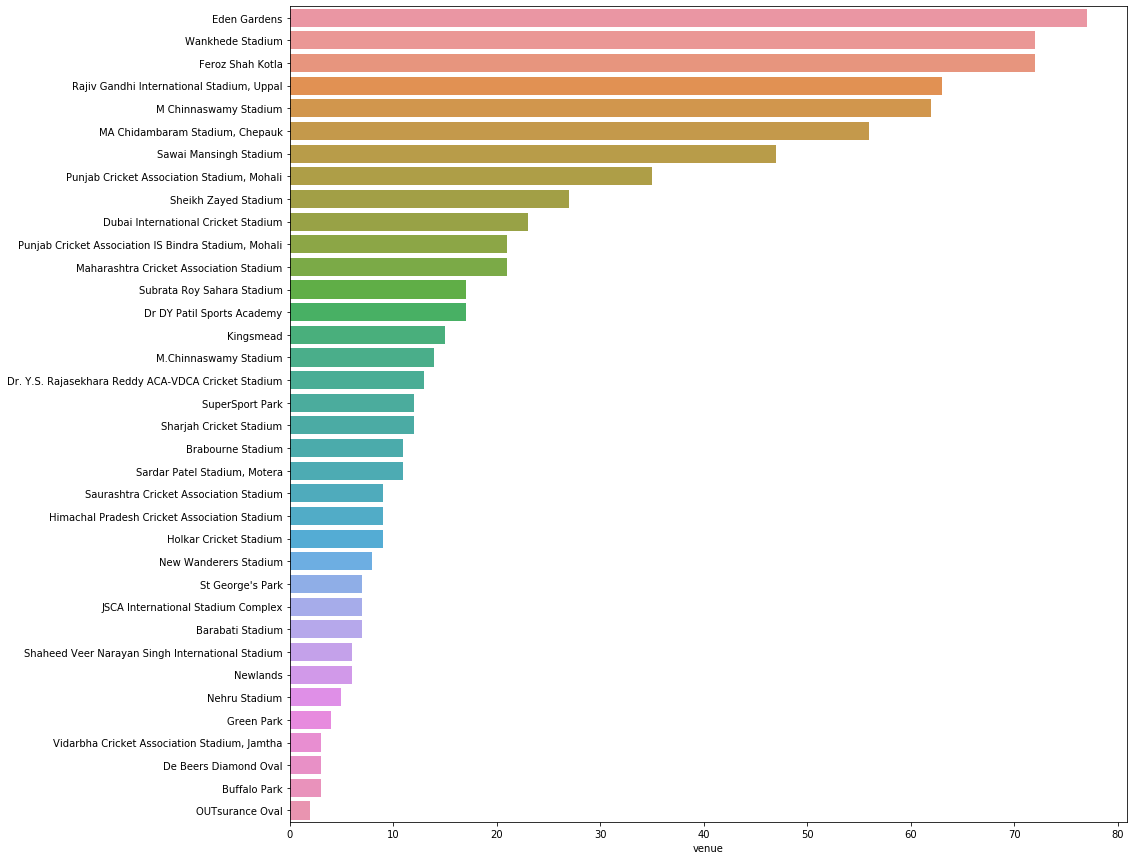

In [42]:
plt.figure(figsize=(15,15))
sns.barplot(y=venue_count.index,x=venue_count,data=df)

Thus, Eden Gardens(Kolkata) has hosted most IPL matches i.e.77 then followed by Wankhede(Mumbai) kiwth 72 matches etc.

### Question 7: Which team has won most no. of toss?

In [43]:
toss_count = df['toss_winner'].value_counts()

In [44]:
toss_count

Mumbai Indians                 100
Chennai Super Kings             96
Kolkata Knight Riders           96
Rajasthan Royals                83
Kings XI Punjab                 81
Royal Challengers Bangalore     81
Delhi Daredevils                79
Sunrisers Hyderabad             53
Deccan Chargers                 43
Pune Warriors                   20
Delhi Capitals                  19
Gujarat Lions                   14
Kochi Tuskers Kerala             8
Rising Pune Supergiants          7
Rising Pune Supergiant           6
Name: toss_winner, dtype: int64

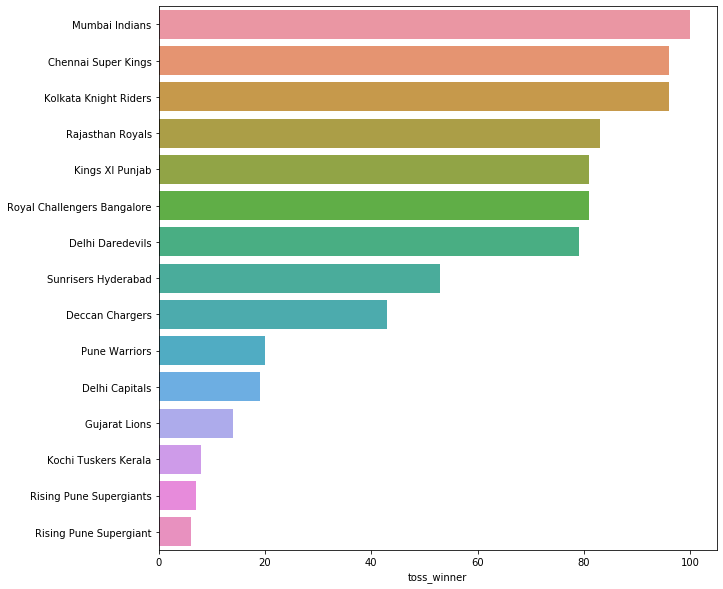

In [45]:
plt.figure(figsize=(10,10))
sns.barplot(y=toss_count.index,x=toss_count,data=df)

Thus team with who won most no. of toss = Mumbai Indians(100 times)
followed by Chennai Supper Kings and KOlkata Knight Rider with 96 times each

### Question 8: Which has higher chance of win: Chasing(Fielding First) or Batting First?

In [46]:
df

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2,season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,BF Bowden,K Hariharan,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810,1216546,Dubai,2020-10-20,S Dhawan,Dubai International Cricket Stadium,0,Delhi Capitals,Kings XI Punjab,Delhi Capitals,bat,Kings XI Punjab,wickets,5.0,N,C Shamshuddin,RK Illingworth,2020
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,CB Gaffaney,Nitin Menon,2020
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,PR Reiffel,S Ravi,2020
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,PR Reiffel,S Ravi,2020


In [47]:
chance1 = df['result'].value_counts()

In [48]:
chance1

wickets    427
runs       359
Name: result, dtype: int64

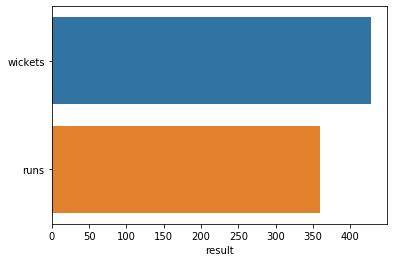

In [49]:
sns.barplot(y=chance1.index,x=chance1,data=df)

In [50]:
df.shape[0]

786

Thus, this very clear that "Chasing-Field First" has resulted in more wins than "Bat First".
Teams have won 427 times 786 times when they "Chase the runs i.e. Field First" whereas teams have won 359 times when they "Bat First". out of 786 times.

### Question 9: Biggest win :Chasing(Field first) and Batting First.


In [51]:
ans = df.groupby(['result'])['result_margin'].max()

In [52]:
ans

result
runs       146.0
wickets     10.0
Name: result_margin, dtype: float64

Thus, we have biggest "win-by-runs" = 146
and biggest "win-by-wickets" = 10
Now, we will find all the data associated with it.

In [53]:
for index, row in df.iterrows():
    if(row['result_margin'] == 10):
        print(row)


id                                     335994
city                                   Mumbai
date                               2008-04-27
player_of_match                  AC Gilchrist
venue              Dr DY Patil Sports Academy
neutral_venue                               0
team1                          Mumbai Indians
team2                         Deccan Chargers
toss_winner                   Deccan Chargers
toss_decision                           field
winner                        Deccan Chargers
result                                wickets
result_margin                              10
eliminator                                  N
umpire1                             Asad Rauf
umpire2                            SL Shastri
season                                   2008
Name: 12, dtype: object
id                                      335998
city                                     Delhi
date                                2008-04-30
player_of_match                     GD McGrath
venue 

Thus, Biggest win registered by-wickets or while Chasing is: 
- Royal Challengers of Bangalore against Sunrisers Hyderabad in 2020 in Dubai International Cricket Stadium.
- Deccan Chargers against Mumbai Indians in 2008 in DY Patil Stadium.
- Delhi Daredevils against Royal Challengers of Bangalore in 2008 in Feroz Shah Kotla Stadium.
- Rajasthan Royals again Chennai Supper Kings in 2008 in Chepauk Chennai Stadium.
- Delhi Daredevils against Kings XI of Punjab in 2009 in Newlands.
- Royal Challengers of Bangalore agaisnt Rajasthan Royals in 2010 in Chinnaswamy Stadium.
- Deccan Charges against Delhi Daredevils in 2010 in Barabati Stadium.
-  and many more.

In [54]:
score = 146
for index, row in df.iterrows():
    if(row['result_margin'] == score):
        print(row)  

id                          1082635
city                          Delhi
date                     2017-05-06
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
neutral_venue                     0
team1              Delhi Daredevils
team2                Mumbai Indians
toss_winner        Delhi Daredevils
toss_decision                 field
winner               Mumbai Indians
result                         runs
result_margin                   146
eliminator                        N
umpire1                 Nitin Menon
umpire2                   CK Nandan
season                         2017
Name: 620, dtype: object


Biggest win registered "by-runs or batting first : Mumbai Indians by  146 runs in 2017 against Delhi Daredevil in Feroz Shah Kotla.

### Question 10: Which Umpire has hosted maximun no. of match?

In [55]:
umpire1_count = df['umpire1'].value_counts()
umpire2_count = df['umpire2'].value_counts()

In [56]:
umpire1_count

HDPK Dharmasena          75
AK Chaudhary             52
Asad Rauf                51
S Ravi                   37
M Erasmus                36
BF Bowden                34
BR Doctrove              34
CB Gaffaney              34
KN Ananthapadmanabhan    33
Aleem Dar                32
AY Dandekar              27
C Shamshuddin            22
NJ Llong                 21
RE Koertzen              20
S Asnani                 19
VA Kulkarni              19
Nitin Menon              18
BNJ Oxenford             16
JD Cloete                15
YC Barde                 14
A Nand Kishore           14
BG Jerling               13
RK Illingworth           13
S Das                    10
SS Hazare                10
MR Benson                 9
DJ Harper                 9
K Hariharan               9
GAV Baxter                7
UV Gandhe                 7
RM Deshpande              7
CK Nandan                 7
IL Howell                 7
SJ Davis                  6
VK Sharma                 6
RJ Tucker           

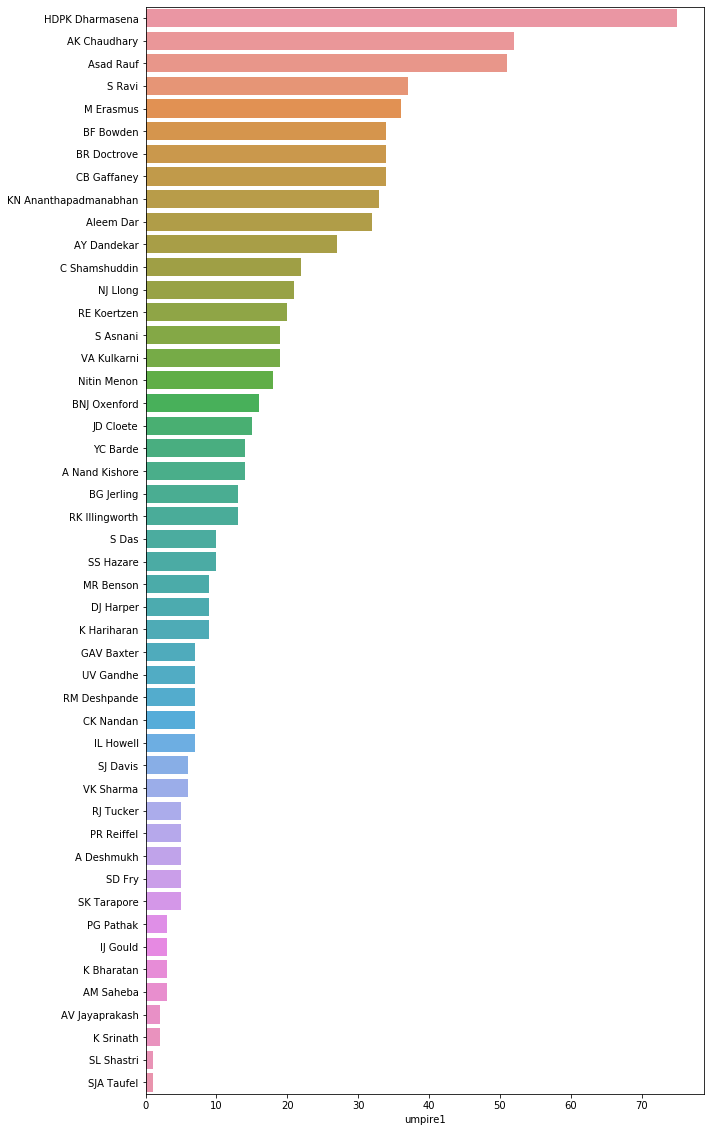

In [57]:
plt.figure(figsize=(10,20))
sns.barplot(y=umpire1_count.index,x=umpire1_count,data=df)

HDPK Dharmasena has the most appearences as Umpire 1 = 75 followed by AK Chaudhary 52 and Asad Rauf = 51.

In [58]:
umpire2_count

S Ravi             76
C Shamshuddin      60
SJA Taufel         54
CK Nandan          49
RJ Tucker          40
Nitin Menon        35
BNJ Oxenford       32
RB Tiffin          30
AK Chaudhary       29
SK Tarapore        26
VA Kulkarni        26
AM Saheba          23
RE Koertzen        21
M Erasmus          21
VK Sharma          20
DJ Harper          17
RK Illingworth     17
PR Reiffel         17
HDPK Dharmasena    16
NJ Llong           15
K Srinath          13
SL Shastri         13
CB Gaffaney        12
S Asnani           11
A Nand Kishore     11
K Hariharan        11
BR Doctrove         8
IL Howell           7
A Deshmukh          7
I Shivram           6
SS Hazare           6
PG Pathak           6
GA Pratapkumar      6
AL Hill             6
YC Barde            5
K Srinivasan        5
S Das               5
TH Wijewardene      5
AV Jayaprakash      4
BG Jerling          4
IJ Gould            3
SD Ranade           2
MR Benson           2
Subroto Das         1
SJ Davis            1
SD Fry    

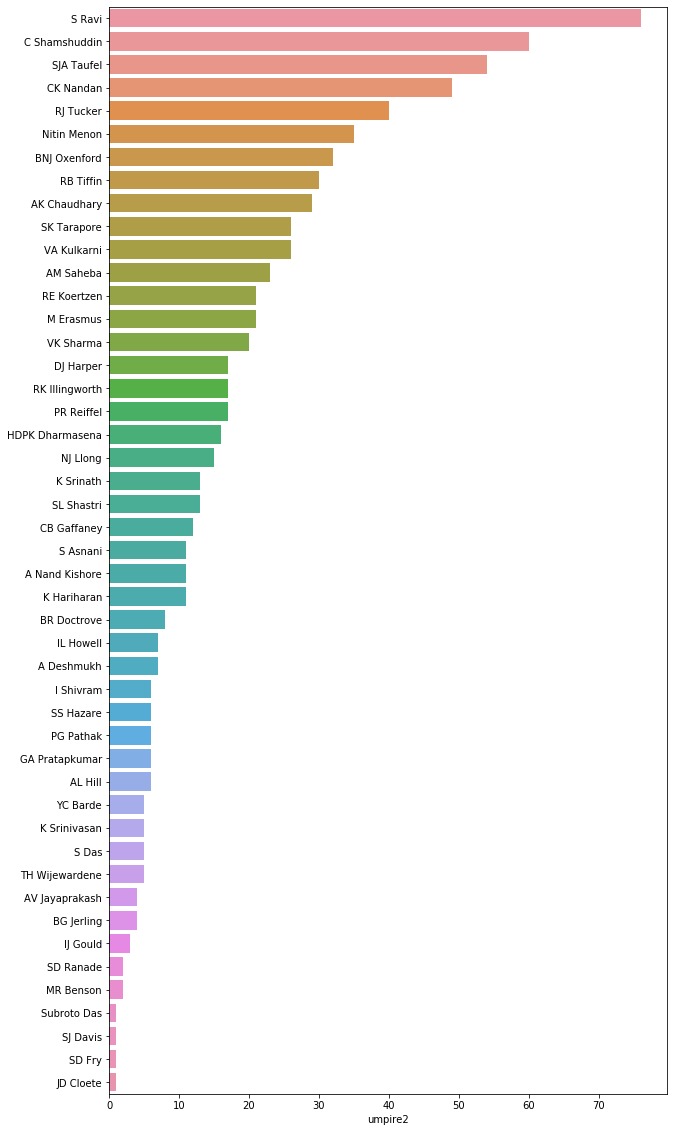

In [59]:
plt.figure(figsize=(10,20))
sns.barplot(y=umpire2_count.index,x=umpire2_count,data=df)

Whereas, S ravi has the most appearences as the Umpire 2 = 76 followed by C Shamsuddin = 60 and SJA Taufel = 54.

In [60]:
umpires_df = pd.concat([umpire1_count, umpire2_count], axis=1)
umpires_df

,umpire1,umpire2
A Deshmukh,5.0,7.0
A Nand Kishore,14.0,11.0
AK Chaudhary,52.0,29.0
AL Hill,NaN,6.0
AM Saheba,3.0,23.0
AV Jayaprakash,2.0,4.0
AY Dandekar,27.0,NaN
Aleem Dar,32.0,NaN
Asad Rauf,51.0,NaN
BF Bowden,34.0,NaN


In [61]:
umpire_count = umpires_df.sum(axis=1)

In [62]:
umpire_count = pd.DataFrame(umpire_count)
umpire_count


,0
A Deshmukh,12.0
A Nand Kishore,25.0
AK Chaudhary,81.0
AL Hill,6.0
AM Saheba,26.0
AV Jayaprakash,6.0
AY Dandekar,27.0
Aleem Dar,32.0
Asad Rauf,51.0
BF Bowden,34.0


In [63]:
umpire_count.sort_values(0,ascending=False)

,0
S Ravi,113.0
HDPK Dharmasena,91.0
C Shamshuddin,82.0
AK Chaudhary,81.0
M Erasmus,57.0
CK Nandan,56.0
SJA Taufel,55.0
Nitin Menon,53.0
Asad Rauf,51.0
BNJ Oxenford,48.0


In [64]:
umpire_count.reset_index(inplace=True)

In [65]:
umpire_count

,index,0
0,A Deshmukh,12.0
1,A Nand Kishore,25.0
2,AK Chaudhary,81.0
3,AL Hill,6.0
4,AM Saheba,26.0
5,AV Jayaprakash,6.0
6,AY Dandekar,27.0
7,Aleem Dar,32.0
8,Asad Rauf,51.0
9,BF Bowden,34.0


In [66]:
umpire_count.sort_values(0,ascending=False,inplace=True)
umpire_count

,index,0
42,S Ravi,113.0
19,HDPK Dharmasena,91.0
13,C Shamshuddin,82.0
2,AK Chaudhary,81.0
29,M Erasmus,57.0
15,CK Nandan,56.0
46,SJA Taufel,55.0
32,Nitin Menon,53.0
8,Asad Rauf,51.0
11,BNJ Oxenford,48.0


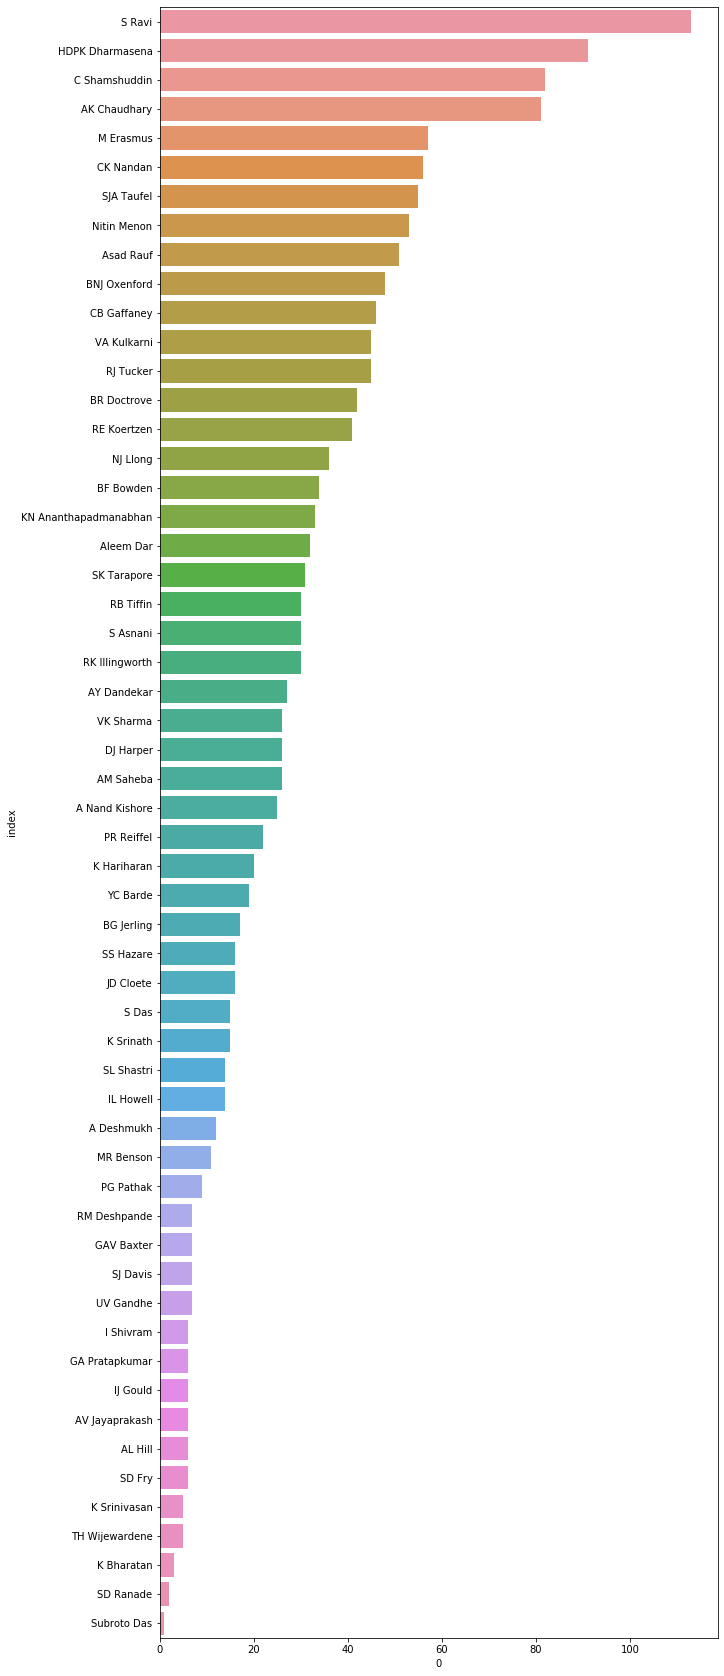

In [67]:
plt.figure(figsize=(10,30))
sns.barplot(y=umpire_count['index'],x=umpire_count[0],data=df)

Thus, Combine appearence as umpire 1 and umpire 2:
S Ravi	113.0 followed by HDPK Dharmasena	91.0 and C Shamshuddin	82.0.
